In [3]:
import random


class Ocean:
    FREE = 0
    BARRIER = 1
    PREY = 2
    PREDATOR = 3
    MAX_TURNS_WITHOUT_EATING = 7

    def __init__(self, width, height, *proportions):
        self.time = 0
        self.width = width
        self.height = height
        random.seed(43)
        if len(proportions) == 4:
            self.free_proportion = proportions[0]
            self.barrier_proportion = proportions[1]
            self.prey_proportion = proportions[2]
            self.predator_propotion = proportions[3]
            self.sum_proportion = self.free_proportion\
            + self.barrier_proportion + self.prey_proportion + self.predator_propotion
        else:
            self.free_proportion = 1
            self.barrier_proportion = 1
            self.prey_proportion = 1
            self.predator_propotion = 1
            self.sum_proportion = 4
        self.ocean = [[random.randint(0, self.sum_proportion) for w in range(self.width)] for h in range(self.height)]
        for i in range(self.height):
            for j in range(self.width):
                cell = self.ocean[i][j]
                if cell < self.free_proportion:
                    cell = 0
                elif cell >= self.free_proportion and cell < self.free_proportion + self.barrier_proportion:
                    cell = 1
                elif cell >= self.free_proportion + self.barrier_proportion\
                and cell < self.sum_proportion - self.predator_propotion:
                    cell = 2
                else:
                    cell = 3
                self.ocean[i][j] = cell
        self.live_ocean = [[0 for w in range(self.width)] for h in range(self.height)]
        for i in range(self.height):
            for j in range(self.width):
                cell = self.ocean[i][j]
                if cell == 2:
                    cell = self.Prey(self, i, j)
                elif cell == 3:
                    cell = self.Predator(self, i, j)
                self.live_ocean[i][j] = cell

    def __str__(self):
        res = ""
        for row in self.ocean:
            for cell in row:
                res += str(cell)
            res += "\n"
        return res

    def isFree(self, x, y):
        if self.ocean[x][y] == Ocean.FREE:
            return True
        else:
            return False

    def isBarrier(self, x, y):
        if self.ocean[x][y] == Ocean.BARRIER:
            return True
        else:
            return False

    def isPrey(self, x, y):
        if self.ocean[x][y] == Ocean.PREY:
            return True
        else:
            return False

    def isPredator(self, x, y):
        if self.ocean[x][y] == Ocean.PREDATOR:
            return True
        else:
            return False

    def setFree(self, x, y):
        self.ocean[x][y] = Ocean.FREE
        self.live_ocean[x][y] = Ocean.FREE

    def setBarrier(self, x, y):
        self.ocean[x][y] = Ocean.BARRIER
        self.live_ocean[x][y] = Ocean.BARRIER

    def setPrey(self, x, y, prey):
        self.ocean[x][y] = Ocean.PREY
        self.live_ocean[x][y] = prey

    def setPredator(self, x, y, predator):
        self.ocean[x][y] = Ocean.PREDATOR
        self.live_ocean[x][y] = predator

    class Prey:
        def __init__(self, ocean, x, y):
            self.ocean = ocean
            self.x = x
            self.y = y
            self.time = self.ocean.time

        def move(self, a, b, prey):
            x = self.x
            y = self.y
            self.x = x + a
            self.y = y + b
            self.ocean.setPrey(self.x, self.y, prey)
            self.ocean.setFree(x, y)

        def duplicate(self, a, b):
            x = self.x
            y = self.y
            self.ocean.setPrey(x + a, y + b, self.ocean.Prey(self.ocean, x + a, y + b))

        def turn(self):
            self.time = self.time + 1
            direction = random.randint(0, 3)
            x = self.x
            y = self.y
            if direction == 0 and x - 1 > -1 and self.ocean.isFree(x - 1, y):
                self.move(-1, 0, self.ocean.live_ocean[x][y])
            if direction == 1 and x + 1 < self.ocean.height and self.ocean.isFree(x + 1, y):
                self.move(1, 0, self.ocean.live_ocean[x][y])
            if direction == 2 and y - 1 > -1 and self.ocean.isFree(x, y - 1):
                self.move(0, -1, self.ocean.live_ocean[x][y])
            if direction == 3 and y + 1 < self.ocean.width and self.ocean.isFree(x, y + 1):
                self.move(0, 1, self.ocean.live_ocean[x][y])

        def reproduction(self):
            self.time = self.time + 1
            direction = random.randint(0, 3)
            x = self.x
            y = self.y
            if direction == 0 and x - 1 > -1 and self.ocean.isFree(x - 1, y):
                self.duplicate(-1, 0)
            if direction == 1 and x + 1 < self.ocean.height and self.ocean.isFree(x + 1, y):
                self.duplicate(1, 0)
            if direction == 2 and y - 1 > -1 and self.ocean.isFree(x, y - 1):
                self.duplicate(0, -1)
            if direction == 3 and y + 1 < self.ocean.width and self.ocean.isFree(x, y + 1):
                self.duplicate(0, 1)

    class Predator:
        def __init__(self, ocean, x, y):
            self.ocean = ocean
            self.x = x
            self.y = y
            self.time = self.ocean.time
            self.turns_without_eating = 0

        def move(self, a, b, predator):
            x = self.x
            y = self.y
            self.x = x + a
            self.y = y + b
            self.ocean.setPredator(self.x, self.y, predator)
            self.ocean.setFree(x, y)

        def duplicate(self, a, b):
            x = self.x
            y = self.y
            self.ocean.setPredator(x + a, y + b, self.ocean.Predator(self.ocean, x + a, y + b))

        def turn(self):
            self.time = self.time + 1
            self.turns_without_eating = self.turns_without_eating + 1
            if self.turns_without_eating > Ocean.MAX_TURNS_WITHOUT_EATING:
                self.ocean.setFree(self.x, self.y)
                return
            direction = random.randint(0, 3)
            x = self.x
            y = self.y
            if direction == 0 and x - 1 > -1 and (self.ocean.isFree(x - 1, y) or self.ocean.isPrey(x - 1, y)):
                if self.ocean.isPrey(x - 1, y):
                    self.turns_without_eating = 0
                self.move(-1, 0, self.ocean.live_ocean[x][y])
            if direction == 1 and x + 1 < self.ocean.height\
            and (self.ocean.isFree(x + 1, y) or self.ocean.isPrey(x + 1, y)):
                if self.ocean.isPrey(x + 1, y):
                    self.turns_without_eating = 0
                self.move(1, 0, self.ocean.live_ocean[x][y])
            if direction == 2 and y - 1 > -1 and (self.ocean.isFree(x, y - 1) or self.ocean.isPrey(x, y - 1)):
                if self.ocean.isPrey(x, y - 1):
                    self.turns_without_eating = 0
                self.move(0, -1, self.ocean.live_ocean[x][y])
            if direction == 3 and y + 1 < self.ocean.width\
            and (self.ocean.isFree(x, y + 1) or self.ocean.isPrey(x, y + 1)):
                if self.ocean.isPrey(x, y + 1):
                    self.turns_without_eating = 0
                self.move(0, 1, self.ocean.live_ocean[x][y])

        def reproduction(self):
            self.time = self.time + 1
            self.turns_without_eating = self.turns_without_eating + 1
            if self.turns_without_eating > Ocean.MAX_TURNS_WITHOUT_EATING:
                self.ocean.setFree(self.x, self.y)
                return
            direction = random.randint(0, 3)
            x = self.x
            y = self.y
            if direction == 0 and x - 1 > -1 and self.ocean.isFree(x - 1, y):
                self.duplicate(-1, 0)
            if direction == 1 and x + 1 < self.ocean.height and self.ocean.isFree(x + 1, y):
                self.duplicate(1, 0)
            if direction == 2 and y - 1 > -1 and self.ocean.isFree(x, y - 1):
                self.duplicate(0, -1)
            if direction == 3 and y + 1 < self.ocean.width and self.ocean.isFree(x, y + 1):
                self.duplicate(0, 1)

    def turn(self):
        for i in range(self.height):
            for j in range(self.width):
                cell = self.live_ocean[i][j]
                if self.isPrey(i, j) or self.isPredator(i, j):
                    if cell.time == self.time:
                        cell.turn()
        self.time = self.time + 1

    def reproduction(self):
        self.time = self.time + 1
        for i in range(self.height):
            for j in range(self.width):
                cell = self.live_ocean[i][j]
                if self.isPrey(i, j) or self.isPredator(i, j):
                    if cell.time < self.time:
                        cell.reproduction()

    def preysReproduction(self):
        self.time = self.time + 1
        for i in range(self.height):
            for j in range(self.width):
                cell = self.live_ocean[i][j]
                if self.isPrey(i, j):
                    if cell.time < self.time:
                        cell.reproduction()

    def predatorsReproduction(self):
        self.time = self.time + 1
        for i in range(self.height):
            for j in range(self.width):
                cell = self.live_ocean[i][j]
                if self.isPredator(i, j):
                    if cell.time < self.time:
                        cell.reproduction()

    def run(self, turns):
        for t in range(turns):
            self.turn()

    def getPredatorsAmount(self):
        ans = 0
        for row in self.ocean:
            for cell in row:
                if cell == Ocean.PREDATOR:
                    ans = ans + 1
        return ans

    def getPreysAmount(self):
        ans = 0
        for row in self.ocean:
            for cell in row:
                if cell == Ocean.PREY:
                    ans = ans + 1
        return ans

    def getStatistics(self, turns, reproduction_period):
        predators = []
        preys = []
        for t in range(turns):
            self.turn()
            if t % reproduction_period == 0:
                self.reproduction()
            predators.append(self.getPredatorsAmount())
            preys.append(self.getPreysAmount()) 
        return (preys, predators)

In [4]:
ocean = Ocean(100, 100, 7, 1, 1, 1)

In [5]:
preys, predators = ocean.getStatistics(turns=1000, reproduction_period=5)

In [367]:
import matplotlib.pyplot as plt
import numpy as np

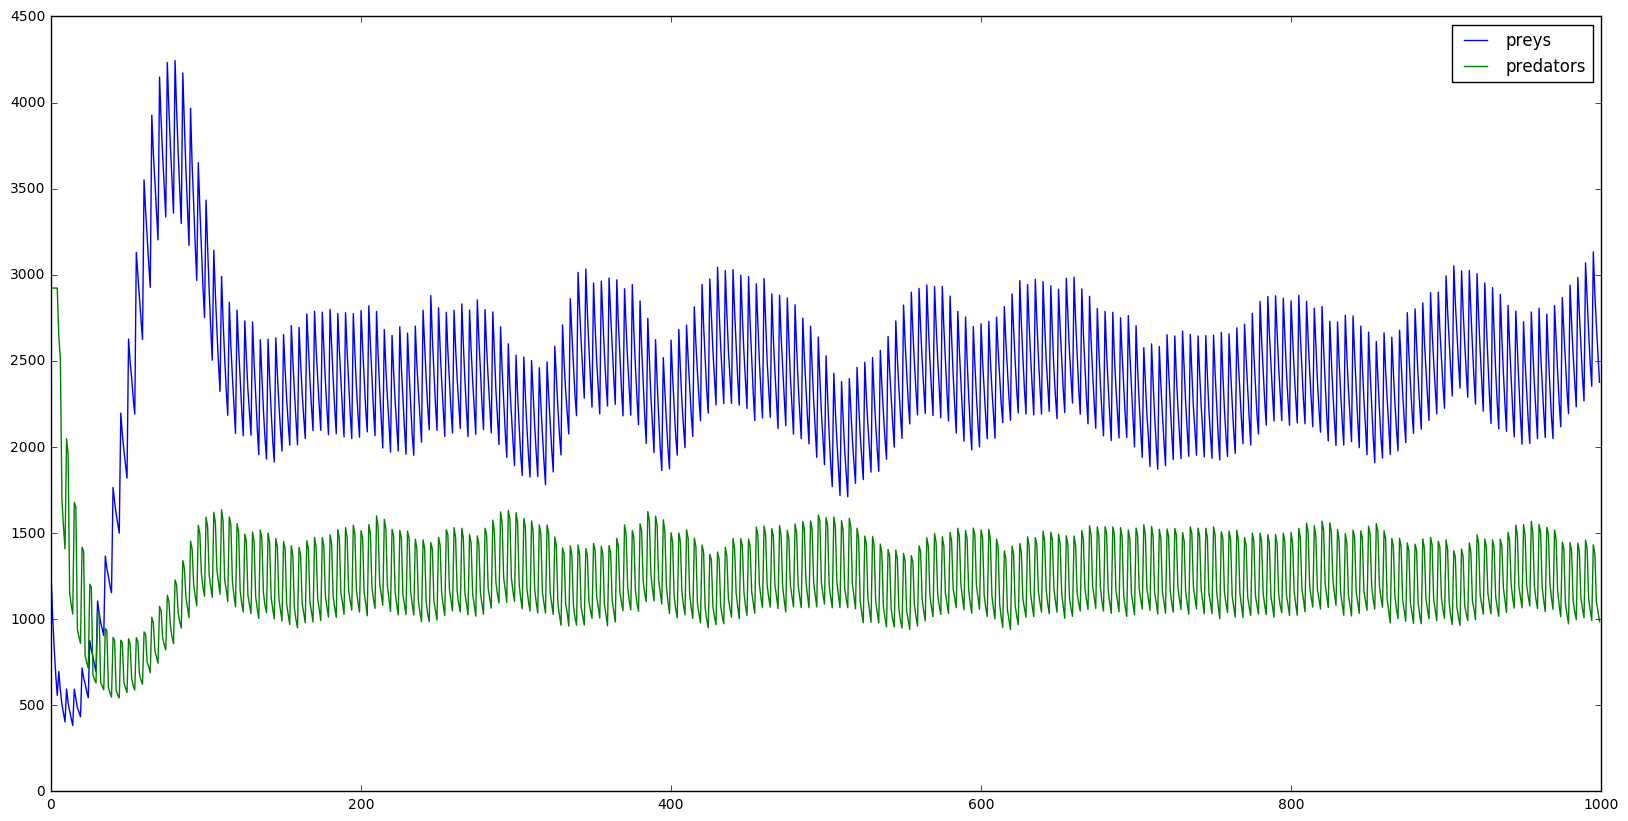

In [368]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(preys)), preys, label="preys")
plt.plot(np.arange(len(predators)), predators, label="predators")
plt.legend()
plt.show()